In [5]:
import pandas as pd
data = pd.read_csv('movie_lens_genre_separated.tsv', sep='\t')

In [454]:
occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}
data['age'] = [age_dict[x] for x in data['age']]
data['occupation'] = [occupation_dict[x] for x in data['occupation']]

### **Question 1: An aggregate (e.g., average) of the movie ratings for each particular genre.**

In [456]:
mean_ratings_genre = data.pivot_table('rating', index='genres', aggfunc='mean',fill_value=0)

print ratings of all genres in ascending order

In [459]:
mean_ratings_genre = mean_ratings_genre.sort_values(by='rating', ascending=False)
mean_ratings_genre

,rating
genres,
Film-Noir,4.075188
Documentary,3.933123
War,3.893327
Drama,3.766332
Crime,3.708679
Animation,3.684895
Mystery,3.668102
Musical,3.665519
Western,3.637770


### **Question 2: The top 5 highest ranked genre by occupation.**

1. group mean ratings of each genre by occupation

In [461]:
ratings_by_occupation = data.pivot_table('rating', index='occupation', columns='genres', aggfunc='mean', fill_value=0)

2. get the top 5 highest ranked genres by occupation

In [463]:
top_5_genres_by_occupation = ratings_by_occupation.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)
top_5_genres_by_occupation

occupation
K-12 student                      [Film-Noir, War, Drama, Crime, Mystery]
academic/educator           [Film-Noir, Documentary, War, Drama, Musical]
artist                      [Film-Noir, Documentary, War, Drama, Mystery]
clerical/admin          [Film-Noir, War, Musical, Documentary, Animation]
college/grad student          [Film-Noir, Documentary, War, Drama, Crime]
customer service          [Film-Noir, Documentary, Animation, War, Drama]
doctor/health care            [Documentary, Film-Noir, War, Drama, Crime]
executive/managerial          [Film-Noir, Documentary, War, Drama, Crime]
farmer                      [Documentary, Film-Noir, War, Western, Drama]
homemaker                   [War, Musical, Documentary, Animation, Drama]
lawyer                      [Film-Noir, Documentary, War, Drama, Mystery]
not specified             [Film-Noir, Documentary, War, Drama, Animation]
programmer                  [Film-Noir, War, Documentary, Drama, Western]
retired                    

### **Question 3: The most popular (with most ratings) movie by age group.**

1. count the number of ratings of each movie grouped by age

In [465]:
data_by_age = data.pivot_table('rating', index='age', columns='title', aggfunc='count',fill_value=0)

2. print the title with most ratings by age group

In [467]:
most_popular_movies = data_by_age.idxmax(axis=1)

In [469]:
most_popular_movies

age
18-24       Star Wars: Episode VI - Return of the Jedi (1983)
25-34       Star Wars: Episode V - The Empire Strikes Back...
35-44       Star Wars: Episode V - The Empire Strikes Back...
45-49       Star Wars: Episode V - The Empire Strikes Back...
50-55       Star Wars: Episode V - The Empire Strikes Back...
56+         Star Wars: Episode V - The Empire Strikes Back...
Under 18    Star Wars: Episode VI - Return of the Jedi (1983)
dtype: object

### **Question 4: A breakdown of a movie’s ratings by occupation, using any movie of your choice.**

1. get the mean rating of each movie by occupation

In [471]:
movie_ratings_by_occupation = data.pivot_table(
    values='rating',
    index='title',
    columns='occupation',
    aggfunc=['max', 'min', 'mean'],  #  max and mean
    fill_value=0
)

2. chose movie 'Gone with the Wind (1939)', print its mean rating by occupation

In [473]:
result = movie_ratings_by_occupation.loc['Gone with the Wind (1939)'].unstack()
print(result)

occupation  K-12 student  academic/educator    artist  clerical/admin  \
max                5.000           5.000000  5.000000             5.0   
min                2.000           1.000000  1.000000             1.0   
mean               4.125           3.882353  3.866667             4.1   

occupation  college/grad student  customer service  doctor/health care  \
max                     5.000000          5.000000            5.000000   
min                     1.000000          1.000000            1.000000   
mean                    3.864407          4.411765            4.092593   

occupation  executive/managerial  farmer  homemaker  ...  not specified  \
max                     5.000000     5.0   5.000000  ...       5.000000   
min                     1.000000     3.0   3.000000  ...       1.000000   
mean                    4.086207     4.0   4.458333  ...       4.053846   

occupation  programmer   retired  sales/marketing  scientist  self-employed  \
max           5.000000  5.0000

### **Question 5: A function that given a user id, returns:**

**(1) this user’s age and occupation**

**(2) the average rating given by this user**

**(3) his highest and lowest rated movie(s)**

In [475]:
def get_user_info(user_id):
    user_info = data[data['user_id']==user_id]

    if user_info.empty:
        return "User doesn't exist!"

    user_info = user_info.set_index('user_id')
    age=user_info['age'].drop_duplicates().values[0]
    occupation=user_info['occupation'].drop_duplicates().values[0]
    all_ratings=user_info['rating']
    average_rating = all_ratings.mean()
    max_rating=max(all_ratings)
    min_rating=min(all_ratings)

    highest_rated_movies = user_info.loc[all_ratings == max_rating]['title'].tolist()
    lowest_rated_movies = user_info.loc[all_ratings == min_rating]['title'].tolist()

    return (
        f"\nuser_id: {user_id}\n"
        f"age: {age}\n"
        f"occupation: {occupation}\n\n"
        f"average_rating: {average_rating}\n\n"
        f"max_rating: {max_rating}\n"
        f"highest_rated_movies: {highest_rated_movies}\n\n"
        f"min_rating: {min_rating}\n"
        f"lowest_rated_movies: {lowest_rated_movies}\n"
    )



**# input user id here to test results:**

In [478]:
user_id=2917
user_info=get_user_info(user_id)
print(user_info)


user_id: 2917
age: 25-34
occupation: not specified

average_rating: 3.423611111111111

max_rating: 5
highest_rated_movies: ['Fargo (1996)', 'Fargo (1996)', 'Fargo (1996)', 'Raiders of the Lost Ark (1981)', 'Raiders of the Lost Ark (1981)', 'Pulp Fiction (1994)', 'Pulp Fiction (1994)', 'Crumb (1994)', 'North by Northwest (1959)', 'North by Northwest (1959)', 'Hard-Boiled (Lashou shentan) (1992)', 'Hard-Boiled (Lashou shentan) (1992)', 'Rear Window (1954)', 'Rear Window (1954)', 'Citizen Kane (1941)', 'Blade Runner (1982)', 'Blade Runner (1982)', 'Annie Hall (1977)', 'Annie Hall (1977)', 'Vertigo (1958)', 'Vertigo (1958)', 'Killer, The (Die xue shuang xiong) (1989)', 'Killer, The (Die xue shuang xiong) (1989)', 'Strangers on a Train (1951)', 'Strangers on a Train (1951)', 'City Lights (1931)', 'City Lights (1931)', 'City Lights (1931)', 'Raging Bull (1980)', 'Fandango (1985)', 'Paradise Lost: The Child Murders at Robin Hood Hills (1996)']

min_rating: 1
lowest_rated_movies: ['Arachnopho

### **Question 6: Some other statistic, chart/visualization, data aggregation, or figure that you created using this dataset, along with a short description of what interesting observations you derived from it.**

### 1. The series of Star Wars are popular, here is the plot presenting the rating differences by gender

In [480]:
star_war_data = data[data['title'].str.startswith('Star Wars', na=False)]

In [482]:
star_war_rated_by_gender = star_war_data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [484]:
star_war_rated_by_gender # chart with mean ratings by gender

gender,F,M
title,,
Star Wars: Episode I - The Phantom Menace (1999),3.328326,3.431054
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058


----------------------------------------------------------------------

In [487]:
star_war_rating_num_by_gender = star_war_data.pivot_table('rating', index='title', columns='gender', aggfunc='count')

In [489]:
star_war_rating_num_by_gender # the number of ratings by gender 

gender,F,M
title,,
Star Wars: Episode I - The Phantom Menace (1999),1864,7136
Star Wars: Episode IV - A New Hope (1977),2588,9376
Star Wars: Episode V - The Empire Strikes Back (1980),3240,11710
Star Wars: Episode VI - Return of the Jedi (1983),3265,11150


*Plots below:*

In [492]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

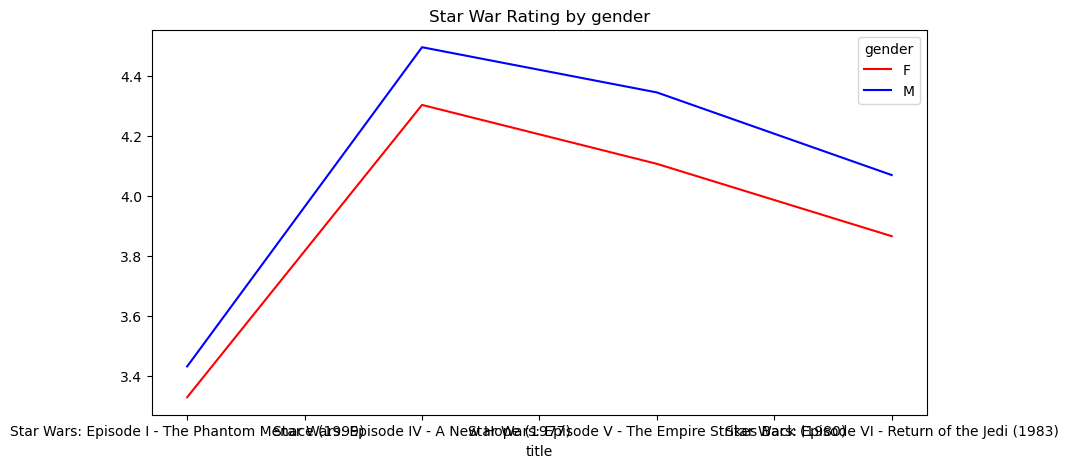

In [494]:
star_war_rated_by_gender.plot(figsize=(10,5), title='Star War Rating by gender', color=["red","blue"]);

-----------------------------------------------------------------------------------------------------------------------

- **count the number of rating of Star Wars by gender**

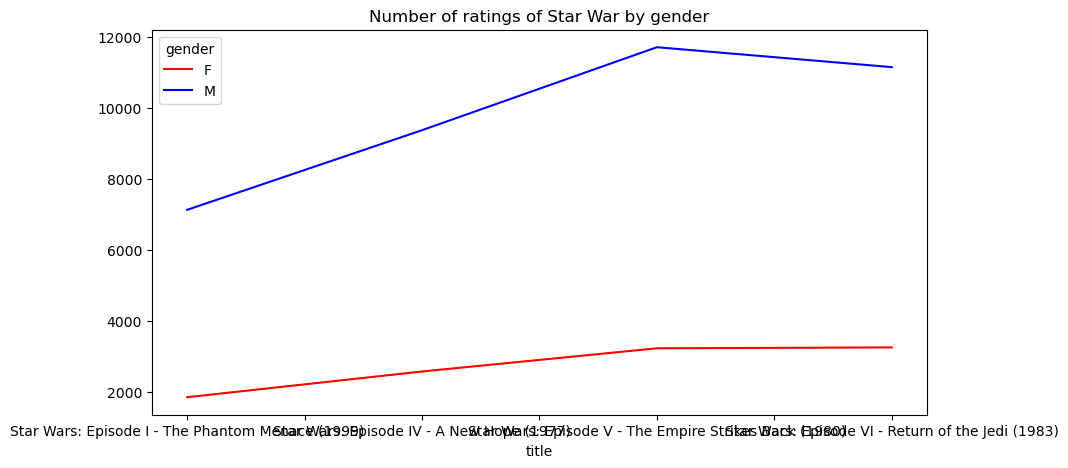

In [498]:
star_war_rating_num_by_gender.plot(figsize=(10,5), title='Number of ratings of Star War by gender', color=["red","blue"]);

we can see that the males rated more than females regarding Star War series, and they gave higher ratings than females. Maybe males like Sci-fi.

Among star wars, Star Wars: Episode IV - A New Hope (1977)	got highest rating, Star Wars: Episode V - The Empire Strikes Back (1980) is most popular(with most ratings than others)

### 2. the percentage of all ratings by age groups

In [502]:
df = data.pivot_table('rating', index='age', aggfunc='count')
df['percentage'] = (df['rating'] / df['rating'].sum()) * 100

In [504]:
df['percentage']

age
18-24       18.643049
25-34       39.553059
35-44       19.865547
45-49        8.263074
50-55        7.126643
56+          3.750134
Under 18     2.798494
Name: percentage, dtype: float64

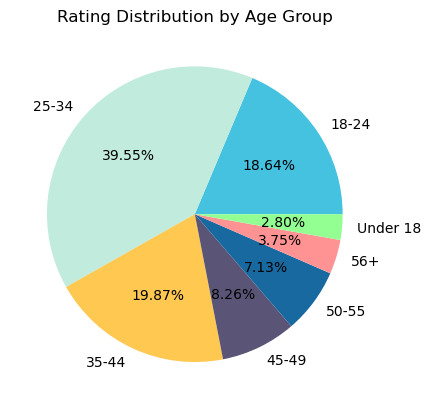

In [506]:
plt.pie(df['percentage'].values,
        colors=['#45C2E0', '#C1EBDD', '#FFC851','#5A5476','#1869A0','#FF9393','#93ff93'],
        labels=df['percentage'].index,
        autopct='%.2f%%'
       )
plt.title("Rating Distribution by Age Group")
plt.show()

From the bar above, we can see audience at age 25 rated most. Young people seemed more passionate about movies.

--------------------------------------------------------end---------------------------------------------------------------